In [2]:
import polars as pl
import matplotlib.pyplot as plt
import hvplot.polars

from src.sec_8k_preprocess import preprocess_sec_8k_nlp
from src.utils.event_study import event_study, compute_caar_ci, plot_caar_ci

%load_ext autoreload
%autoreload 2

In [3]:
df_finbert = preprocess_sec_8k_nlp(item_to_parse="8.01", nlp_mode="finbert")
df_finbert.head()

[INFO] Loading existing preprocessed file: data/preprocessed/item_8_01_finbert.parquet


permno,filing_date,report_date,report_year,days_between_report_and_filing,sentiment_score,item_txt
i64,date,date,i32,i32,f32,str
14286,2006-12-29,2006-12-26,2006,3,0.451225,"""Other Events. On December 26,…"
14286,2004-10-13,2004-10-12,2004,1,0.916354,""" Other Events. On October 12, …"
68523,2005-09-21,2005-09-16,2005,5,0.525634,"""Other Events On Septem…"
39482,2010-02-02,2010-01-28,2010,5,0.829918,"""ITEM 8.01 OTHER EVENTS Americ…"
39482,2009-12-11,2009-12-09,2009,2,0.619829,"""Item 8.01. Other Events. On …"


In [4]:
df_finbert_mean_chunk = preprocess_sec_8k_nlp(item_to_parse="8.01", nlp_mode="finbert_mean_chunk")
df_finbert_mean_chunk.head()

[INFO] Loading existing preprocessed file: data/preprocessed/item_8_01_finbert_mean_chunk.parquet


permno,filing_date,report_date,report_year,days_between_report_and_filing,item_txt,sentiment_score
i64,date,date,i32,i32,str,f64
14286,2006-12-29,2006-12-26,2006,3,"""Other Events. On December 26,…",0.672787
14286,2004-10-13,2004-10-12,2004,1,""" Other Events. On October 12, …",0.912676
68523,2005-09-21,2005-09-16,2005,5,"""Other Events On Septem…",0.497292
39482,2010-02-02,2010-01-28,2010,5,"""ITEM 8.01 OTHER EVENTS Americ…",0.822607
39482,2009-12-11,2009-12-09,2009,2,"""Item 8.01. Other Events. On …",0.694882


In [5]:
df_mistral_finbert = preprocess_sec_8k_nlp(item_to_parse="8.01", nlp_mode="mistral_summary_to_finbert")
df_mistral_finbert.head()

[INFO] Loading existing preprocessed file: data/preprocessed/item_8_01_mistral_summary_to_finbert.parquet


permno,filing_date,report_date,report_year,days_between_report_and_filing,item_txt,sentiment_score
i64,date,date,i32,i32,str,f64
14286,2006-12-29,2006-12-26,2006,3,"""Other Events. On December 26,…",0.018965
14286,2004-10-13,2004-10-12,2004,1,""" Other Events. On October 12, …",0.921408
68523,2005-09-21,2005-09-16,2005,5,"""Other Events On Septem…",0.832633
39482,2010-02-02,2010-01-28,2010,5,"""ITEM 8.01 OTHER EVENTS Americ…",0.257812
39482,2009-12-11,2009-12-09,2009,2,"""Item 8.01. Other Events. On …",0.056182


In [6]:
# remove rows with no filing date
df_events_8_01 = df_finbert.filter(pl.col('filing_date').is_not_null())
df_events_8_01 = df_events_8_01.rename({'report_date': 'event_date'})
df_events_8_01 = df_events_8_01.select(['permno', 'event_date'])

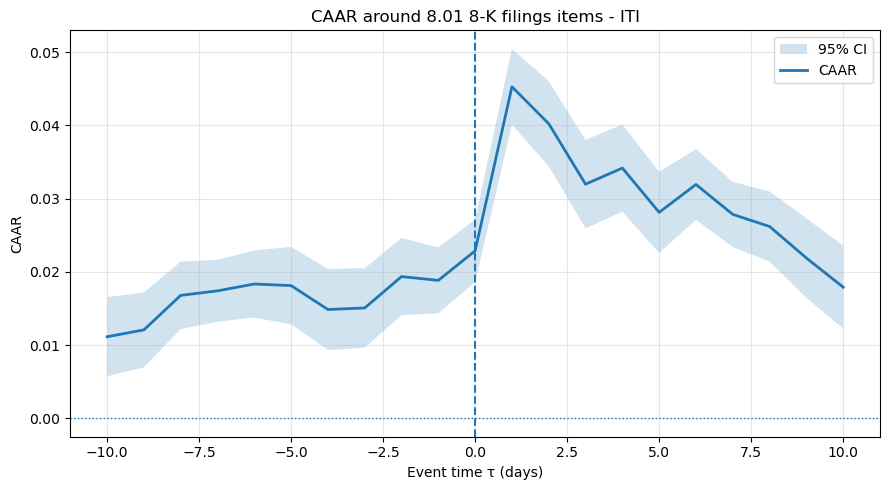

In [7]:
item_8_01_results_iti = event_study(
    df_events=df_events_8_01.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject = 'ITI')

item_8_01_caar_iti = compute_caar_ci(item_8_01_results_iti)
plot_caar_ci(item_8_01_caar_iti, title='CAAR around 8.01 8-K filings items - ITI')

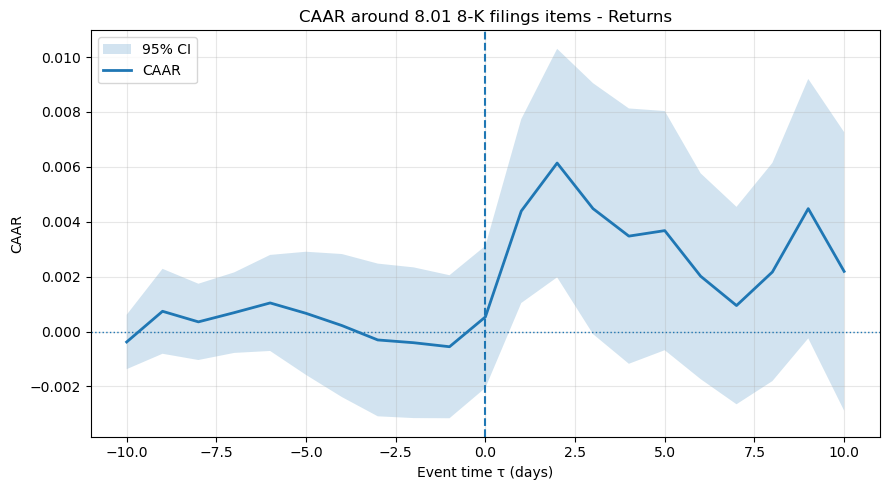

In [8]:
item_8_01_results_returns = event_study(
    df_events=df_events_8_01.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject = 'returns')

item_8_01_caar_returns = compute_caar_ci(item_8_01_results_returns)
plot_caar_ci(item_8_01_caar_returns, title='CAAR around 8.01 8-K filings items - Returns')

In [9]:
# Select the sentiment_score column from each df
s1 = df_finbert.select(pl.col('sentiment_score').alias('finbert'))
s2 = df_finbert_mean_chunk.select(pl.col('sentiment_score').alias('finbert_mean'))
s3 = df_mistral_finbert.select(pl.col('sentiment_score').alias('mistral_finbert'))

# Horizontal concat to get them side by side
df_finbert_stats = pl.concat([s1, s2, s3], how='horizontal')

# Show stats
df_finbert_stats.describe()

statistic,finbert,finbert_mean,mistral_finbert
str,f64,f64,f64
"""count""",13359.0,13359.0,13359.0
"""null_count""",0.0,0.0,0.0
"""mean""",0.73537,0.757957,0.607463
"""std""",0.318212,0.286426,0.396234
"""min""",-0.925356,-0.925658,-0.93411
"""25%""",0.731961,0.764775,0.36946
"""50%""",0.871535,0.873363,0.810242
"""75%""",0.906929,0.906916,0.896484
"""max""",0.9384,0.937808,0.938408


In [10]:
sentiment_finbert = df_finbert.filter(pl.col('sentiment_score').is_not_null()).select(['permno', 'filing_date', 'sentiment_score'])
sentiment_finbert = sentiment_finbert.rename({'filing_date': 'event_date'})

# select top 25% sentiment scores
sent_finbert_top_25 = sentiment_finbert.filter(pl.col('sentiment_score') >= sentiment_finbert.select(pl.col('sentiment_score').quantile(0.75)).item())

# select bottom 25% sentiment scores
sent_finbert_bottom_25 = sentiment_finbert.filter(pl.col('sentiment_score') <= sentiment_finbert.select(pl.col('sentiment_score').quantile(0.25)).item())

# select middle 50% sentiment scores
sent_finbert_middle_50 = sentiment_finbert.filter(
    (pl.col('sentiment_score') > sentiment_finbert.select(pl.col('sentiment_score').quantile(0.25)).item()) &
    (pl.col('sentiment_score') < sentiment_finbert.select(pl.col('sentiment_score').quantile(0.75)).item())
)

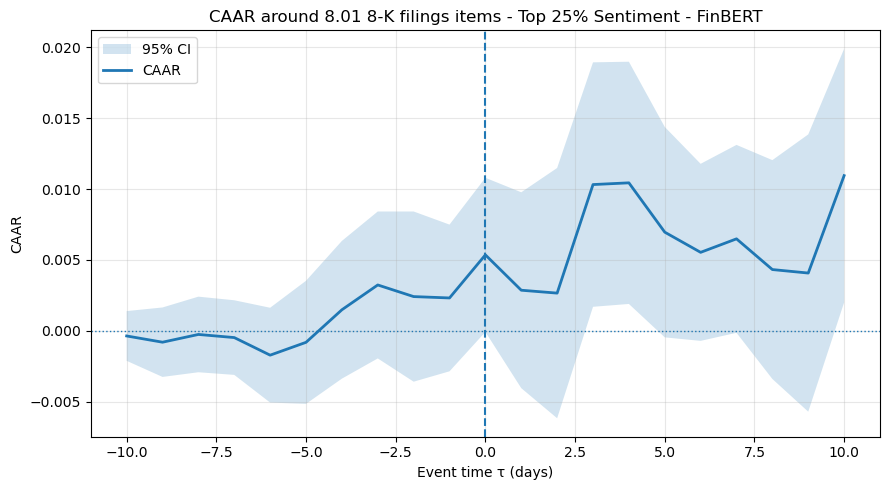

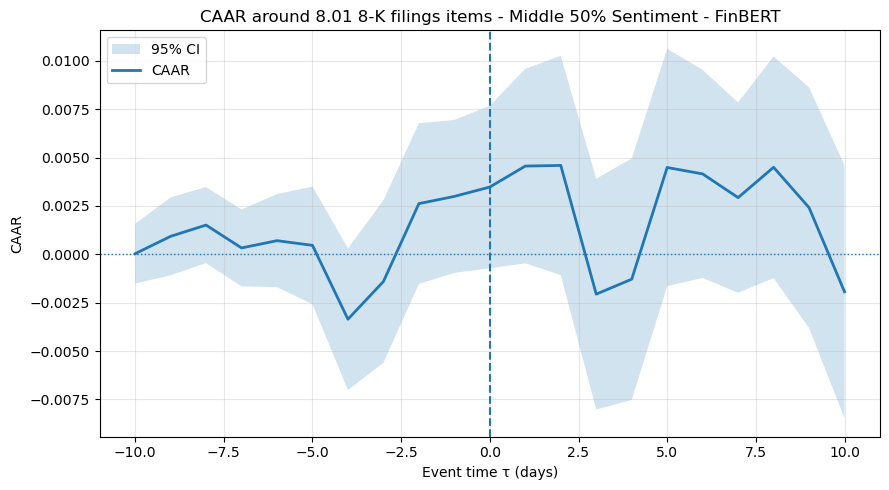

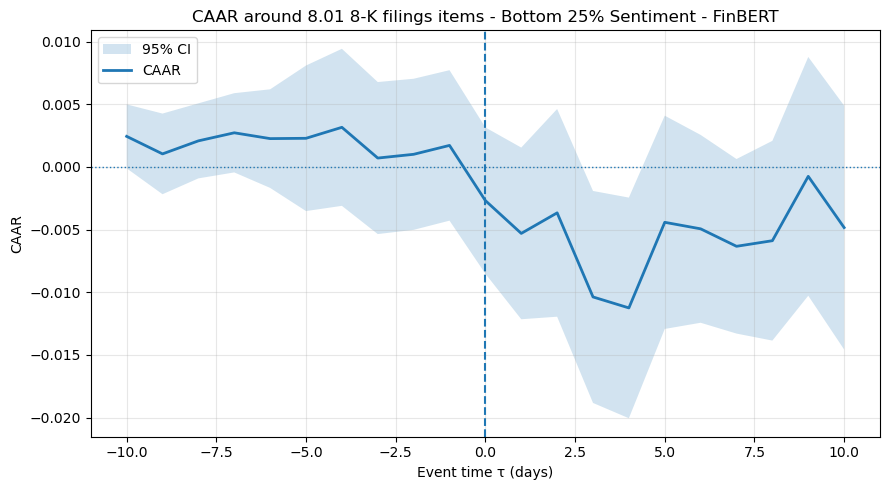

In [17]:
for df_sent, label in zip([sent_finbert_top_25, sent_finbert_middle_50, sent_finbert_bottom_25], ['Top 25% Sentiment - FinBERT', 'Middle 50% Sentiment - FinBERT', 'Bottom 25% Sentiment - FinBERT']):
    results = event_study(
        df_events=df_sent.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
    caar = compute_caar_ci(results)
    plot_caar_ci(caar, title=f'CAAR around 8.01 8-K filings items - {label}')

In [15]:
sentiment_finbert_mean = df_finbert_mean_chunk.filter(pl.col('sentiment_score').is_not_null()).select(['permno', 'filing_date', 'sentiment_score'])
sentiment_finbert_mean = sentiment_finbert_mean.rename({'filing_date': 'event_date'})

# select top 25% sentiment scores
sent_finbert_mean_top_25 = sentiment_finbert_mean.filter(pl.col('sentiment_score') >= sentiment_finbert_mean.select(pl.col('sentiment_score').quantile(0.75)).item())

# select bottom 25% sentiment scores
sent_finbert_mean_bottom_25 = sentiment_finbert_mean.filter(pl.col('sentiment_score') <= sentiment_finbert_mean.select(pl.col('sentiment_score').quantile(0.25)).item())

# select middle 50% sentiment scores
sent_finbert_mean_middle_50 = sentiment_finbert_mean.filter(
    (pl.col('sentiment_score') > sentiment_finbert_mean.select(pl.col('sentiment_score').quantile(0.25)).item()) &
    (pl.col('sentiment_score') < sentiment_finbert_mean.select(pl.col('sentiment_score').quantile(0.75)).item())
)

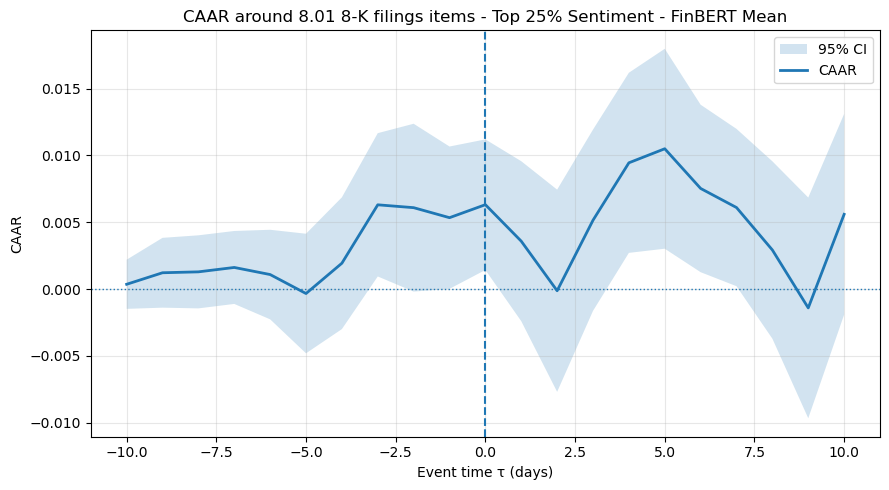

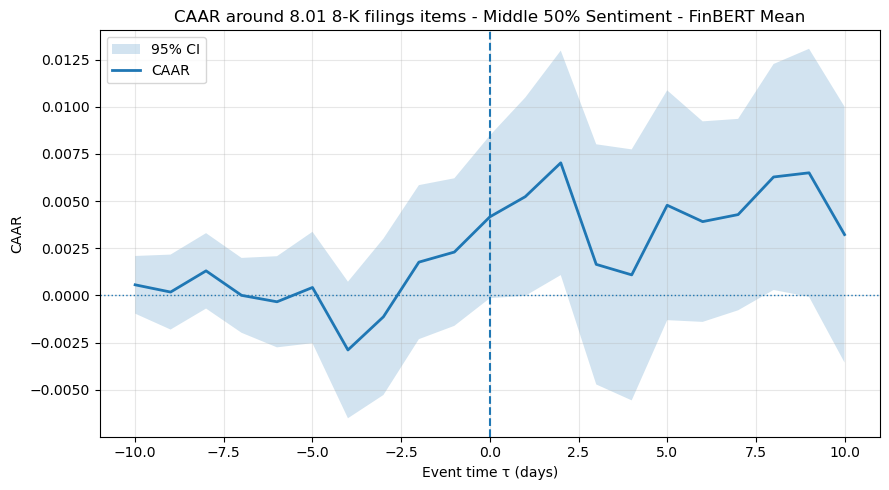

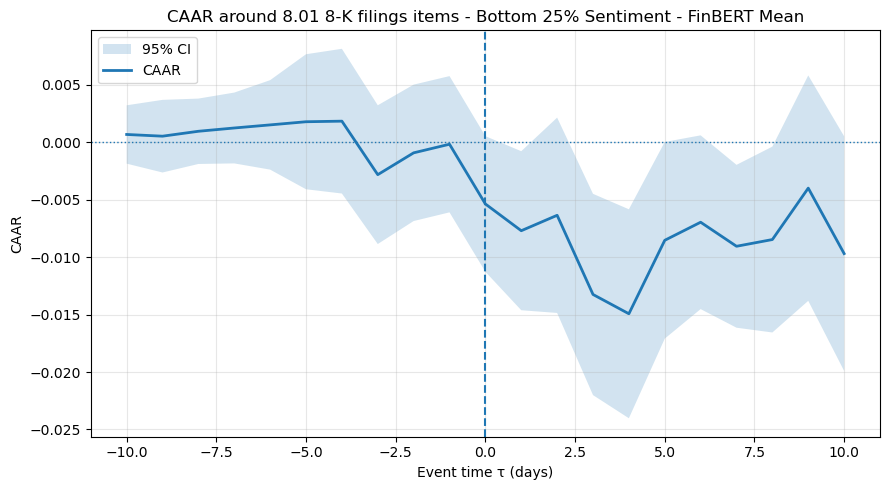

In [16]:
for df_sent, label in zip([sent_finbert_mean_top_25, sent_finbert_mean_middle_50, sent_finbert_mean_bottom_25], ['Top 25% Sentiment - FinBERT Mean', 'Middle 50% Sentiment - FinBERT Mean', 'Bottom 25% Sentiment - FinBERT Mean']):
    results = event_study(
        df_events=df_sent.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
    caar = compute_caar_ci(results)
    plot_caar_ci(caar, title=f'CAAR around 8.01 8-K filings items - {label}')

In [13]:
sentiment_mistral_finbert = df_mistral_finbert.filter(pl.col('sentiment_score').is_not_null()).select(['permno', 'filing_date', 'sentiment_score'])
sentiment_mistral_finbert = sentiment_mistral_finbert.rename({'filing_date': 'event_date'})

# select top 25% sentiment scores
sent_mistral_finbert_top_25 = sentiment_mistral_finbert.filter(pl.col('sentiment_score') >= sentiment_mistral_finbert.select(pl.col('sentiment_score').quantile(0.75)).item())

# select bottom 25% sentiment scores
sent_mistral_finbert_bottom_25 = sentiment_mistral_finbert.filter(pl.col('sentiment_score') <= sentiment_mistral_finbert.select(pl.col('sentiment_score').quantile(0.25)).item())

# select middle 50% sentiment scores
sent_mistral_finbert_middle_50 = sentiment_mistral_finbert.filter(
    (pl.col('sentiment_score') > sentiment_mistral_finbert.select(pl.col('sentiment_score').quantile(0.25)).item()) &
    (pl.col('sentiment_score') < sentiment_mistral_finbert.select(pl.col('sentiment_score').quantile(0.75)).item())
)

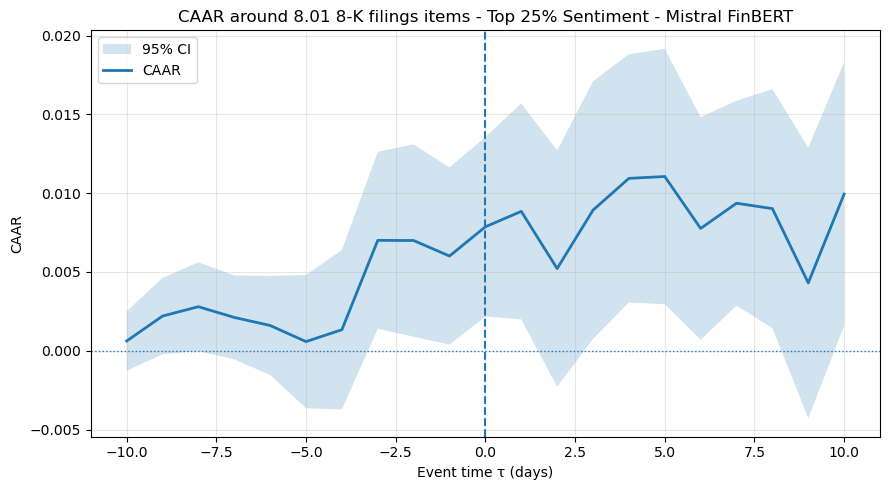

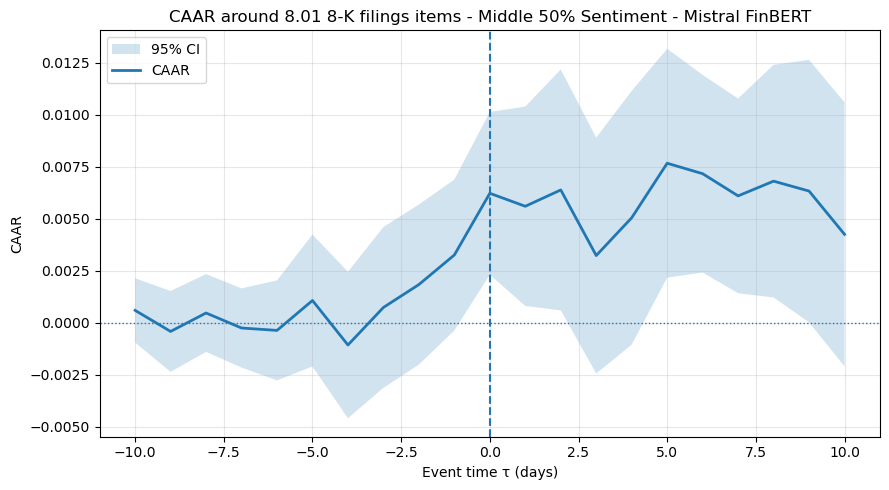

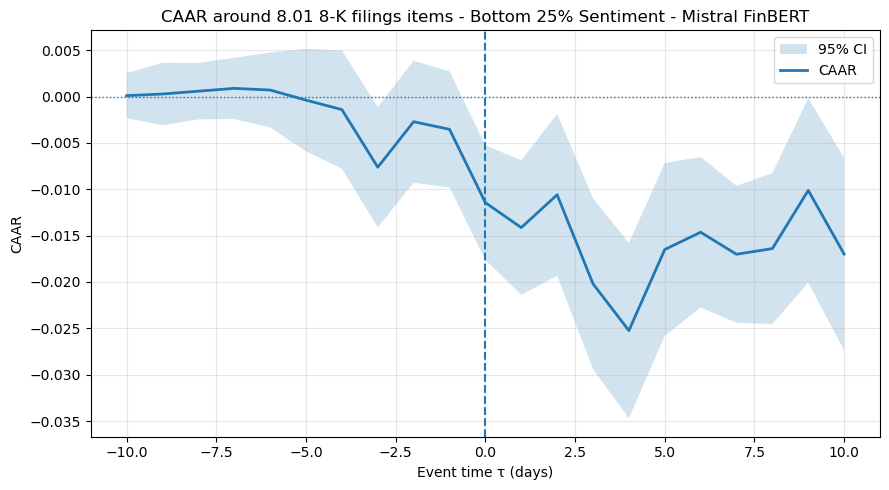

In [14]:
for df_sent, label in zip([sent_mistral_finbert_top_25, sent_mistral_finbert_middle_50, sent_mistral_finbert_bottom_25], ['Top 25% Sentiment - Mistral FinBERT', 'Middle 50% Sentiment - Mistral FinBERT', 'Bottom 25% Sentiment - Mistral FinBERT']):
    results = event_study(
        df_events=df_sent.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
    caar = compute_caar_ci(results)
    plot_caar_ci(caar, title=f'CAAR around 8.01 8-K filings items - {label}')

In [1]:
from src.iti_8k_merge import merge_8k_iti
df_8k_iti = merge_8k_iti()

 Parquet file exists at data/preprocessed/submissions_8k.parquet. Reading...
Connecting to WRDS as williamandwing...
postgresql://williamandwing:@wrds-pgdata.wharton.upenn.edu:9737/wrds
Loading library list...
Done
Number of rows with missing permno: 0


In [2]:
# Filter to filings with ITI and days_between_report_and_filing <= 4
df_8k_iti_filter = df_8k_iti.filter(pl.col('days_between_report_and_filing') <= 4)

NameError: name 'pl' is not defined

In [ ]:
df_8k_iti_filter

permno,date,ITI(13D),ITI(impatient),ITI(patient),ITI(insider),ITI(short),filing_date,report_year,days_between_report_and_filing,url_txt,items
i64,date,f64,f64,f64,f64,f64,date,i32,i32,str,str
10002,2004-02-12,0.079014,0.102983,0.051119,0.2189175,0.276776,2004-02-13,2004,1,"""https://www.sec.gov/Archives/e…","""12,7"""
10002,2004-02-12,0.079014,0.102983,0.051119,0.2189175,0.276776,2004-02-13,2004,1,"""https://www.sec.gov/Archives/e…","""12,7"""
10002,2004-07-27,0.273682,0.359786,0.118498,null,0.406659,2004-07-28,2004,1,"""https://www.sec.gov/Archives/e…","""12"""
10002,2004-10-27,0.0972562,0.365818,0.083833,0.442416,0.387595,2004-10-28,2004,1,"""https://www.sec.gov/Archives/e…","""2.02,9.01"""
10002,2005-01-24,0.6367818,0.589579,0.4031058,null,0.4429599,2005-01-27,2005,3,"""https://www.sec.gov/Archives/e…","""2.02,9.01"""
…,…,…,…,…,…,…,…,…,…,…,…
93428,2014-09-22,null,null,null,0.5782608,0.3498985,2014-09-23,2014,1,"""https://www.sec.gov/Archives/e…","""5.02"""
93428,2014-11-04,0.281972,0.239654,0.2947011,0.619906,0.391028,2014-11-05,2014,1,"""https://www.sec.gov/Archives/e…","""2.02,9.01"""
93435,2011-03-07,0.187343,0.2992311,0.33558,0.468232,0.34459,2011-03-11,2011,4,"""https://www.sec.gov/Archives/e…","""5.02,9.01"""


In [74]:
item_to_section = {
    "1.01": "Registrant's Business and Operations",
    "1.02": "Registrant's Business and Operations",
    "1.03": "Registrant's Business and Operations",

    "2.01": "Financial Information",
    "2.02": "Financial Information",
    "2.03": "Financial Information",
    "2.04": "Financial Information",
    "2.05": "Financial Information",
    "2.06": "Financial Information",

    "3.01": "Securities and Trading Markets",
    "3.02": "Securities and Trading Markets",
    "3.03": "Securities and Trading Markets",

    "4.01": "Matters Related to Accountants and Financial Statements",
    "4.02": "Matters Related to Accountants and Financial Statements",

    "5.01": "Corporate Governance and Management",
    "5.02": "Corporate Governance and Management",
    "5.03": "Corporate Governance and Management",
    "5.04": "Corporate Governance and Management",
    "5.05": "Corporate Governance and Management",
    "5.06": "Corporate Governance and Management",
    "5.07": "Corporate Governance and Management",

    "6.01": "Asset-Backed Securities",
    "6.02": "Asset-Backed Securities",
    "6.03": "Asset-Backed Securities",
    "6.04": "Asset-Backed Securities",
    "6.05": "Asset-Backed Securities",

    "7.01": "Regulation FD",

    "8.01": "Other Events",

    "9.01": "Financial Statements and Exhibits"
}

sections_list = set()
for k, v in item_to_section.items():
    sections_list.add(v)
sections_list = list(sections_list)

In [51]:
# count number of filings per section
# map item numbers (possibly comma-separated) to section names using item_to_section dict
def _map_item_to_section(item_str):
    if item_str is None:
        return None
    # handle multiple items like "2.02,9.01"
    items = [s.strip() for s in str(item_str).split(',') if s.strip()]
    sections = [item_to_section.get(it) for it in items]
    # keep order, remove None and duplicates
    sections = [s for s in dict.fromkeys(sections) if s]
    return ', '.join(sections) if sections else None

df_8k_iti_filter = df_8k_iti_filter.with_columns(
    pl.col('items').map_elements(_map_item_to_section).alias('item_section')
)
df_8k_iti_filter

permno,date,ITI(13D),ITI(impatient),ITI(patient),ITI(insider),ITI(short),filing_date,report_year,days_between_report_and_filing,url_txt,items,item_section
i64,date,f64,f64,f64,f64,f64,date,i32,i32,str,str,str
10002,2004-02-12,0.079014,0.102983,0.051119,0.2189175,0.276776,2004-02-13,2004,1,"""https://www.sec.gov/Archives/e…","""12,7""",null
10002,2004-02-12,0.079014,0.102983,0.051119,0.2189175,0.276776,2004-02-13,2004,1,"""https://www.sec.gov/Archives/e…","""12,7""",null
10002,2004-07-27,0.273682,0.359786,0.118498,null,0.406659,2004-07-28,2004,1,"""https://www.sec.gov/Archives/e…","""12""",null
10002,2004-10-27,0.0972562,0.365818,0.083833,0.442416,0.387595,2004-10-28,2004,1,"""https://www.sec.gov/Archives/e…","""2.02,9.01""","""Financial Information, Financi…"
10002,2005-01-24,0.6367818,0.589579,0.4031058,null,0.4429599,2005-01-27,2005,3,"""https://www.sec.gov/Archives/e…","""2.02,9.01""","""Financial Information, Financi…"
…,…,…,…,…,…,…,…,…,…,…,…,…
93428,2014-09-22,null,null,null,0.5782608,0.3498985,2014-09-23,2014,1,"""https://www.sec.gov/Archives/e…","""5.02""","""Corporate Governance and Manag…"
93428,2014-11-04,0.281972,0.239654,0.2947011,0.619906,0.391028,2014-11-05,2014,1,"""https://www.sec.gov/Archives/e…","""2.02,9.01""","""Financial Information, Financi…"
93435,2011-03-07,0.187343,0.2992311,0.33558,0.468232,0.34459,2011-03-11,2011,4,"""https://www.sec.gov/Archives/e…","""5.02,9.01""","""Corporate Governance and Manag…"


In [ ]:
# keep only non nan item_section
df_8k_iti_filter = df_8k_iti_filter.filter(pl.col('item_section').is_not_null())

df_item_events = df_8k_iti_filter.select(pl.col('date'), pl.col('permno')).unique()
df_item_events = df_item_events.rename({'date': 'event_date'})

item_results = event_study(
    df_events=df_item_events.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject='ITI')

In [79]:
def plot_caar_ci_multi(df, tau_col='tau', type='ITI', title=f'CAAR {type} by section'):
    plt.figure(figsize=(10,6))

    for section, subdf in df.groupby('section'):
        # Plot CAAR mean
        plt.plot(
            subdf[tau_col],
            subdf['mean_CAR'],
            linewidth=2,
            label=f'{section}'
        )

        # Optional: confidence interval band
        plt.fill_between(
            subdf[tau_col],
            subdf['ci_low'],
            subdf['ci_high'],
            alpha=0.15
        )

    plt.axvline(0, linestyle='--')
    plt.axhline(0, linestyle=':', lw=1)

    plt.xlabel("Event time τ (days)")
    plt.ylabel(f"CAAR ({type})")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

Processing section: Securities and Trading Markets with 2452 events
Processing section: Matters Related to Accountants and Financial Statements with 734 events
Processing section: Other Events with 17075 events
Processing section: Corporate Governance and Management with 20435 events
Processing section: Regulation FD with 9059 events
Processing section: Financial Statements and Exhibits with 44956 events
Processing section: Financial Information with 17130 events
Processing section: Registrant's Business and Operations with 14561 events
Processing section: Asset-Backed Securities with 1 events


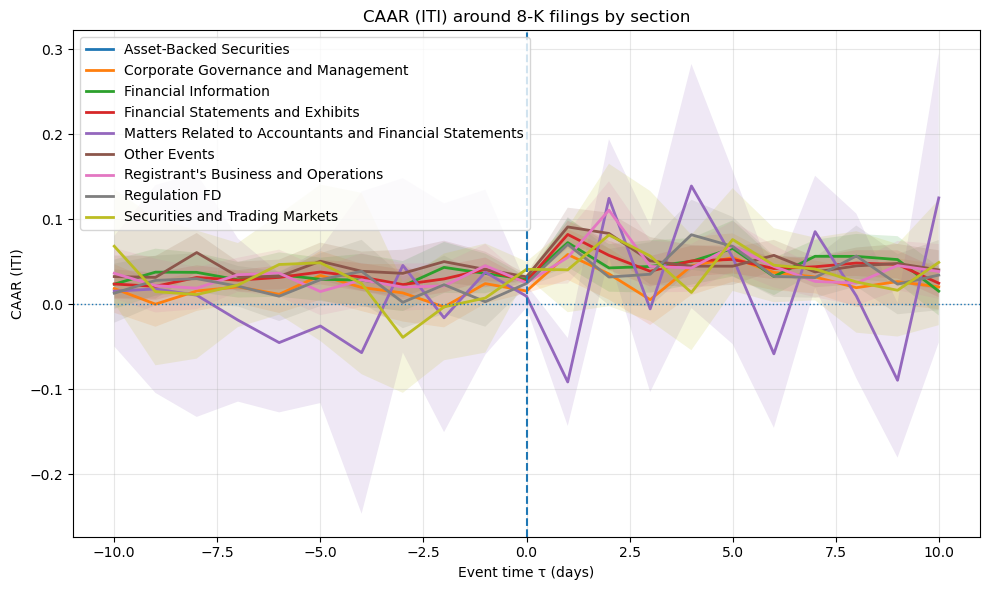

In [80]:
import pandas as pd

all_sections_caar = []

for section in sections_list:
    # Filter rows matching the section
    df_section = df_8k_iti_filter.filter(pl.col('item_section').str.contains(section))
    df_section = df_section.select(['permno', 'date'])
    print(f"Processing section: {section} with {df_section.height} events")

    # Compute CAAR for *that* subsample
    specific_item_results = item_results.merge(
        df_section.to_pandas(),
        on=['permno', 'date'],
        how='inner'
    )
    caar_general = compute_caar_ci(specific_item_results)

    # Add a column with the section name
    caar_general['section'] = section

    # Append to list
    all_sections_caar.append(caar_general)

# Concatenate all results
all_sections_caar = pd.concat(all_sections_caar, ignore_index=True)

plot_caar_ci_multi(all_sections_caar,
                   title="CAAR (ITI) around 8-K filings by section",
                   type='ITI')


In [76]:
item_results_returns = event_study(
    df_events=df_item_events.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject='returns')

Processing section: Securities and Trading Markets with 2452 events
Processing section: Matters Related to Accountants and Financial Statements with 734 events
Processing section: Other Events with 17075 events
Processing section: Corporate Governance and Management with 20435 events
Processing section: Regulation FD with 9059 events
Processing section: Financial Statements and Exhibits with 44956 events
Processing section: Financial Information with 17130 events
Processing section: Registrant's Business and Operations with 14561 events
Processing section: Asset-Backed Securities with 1 events


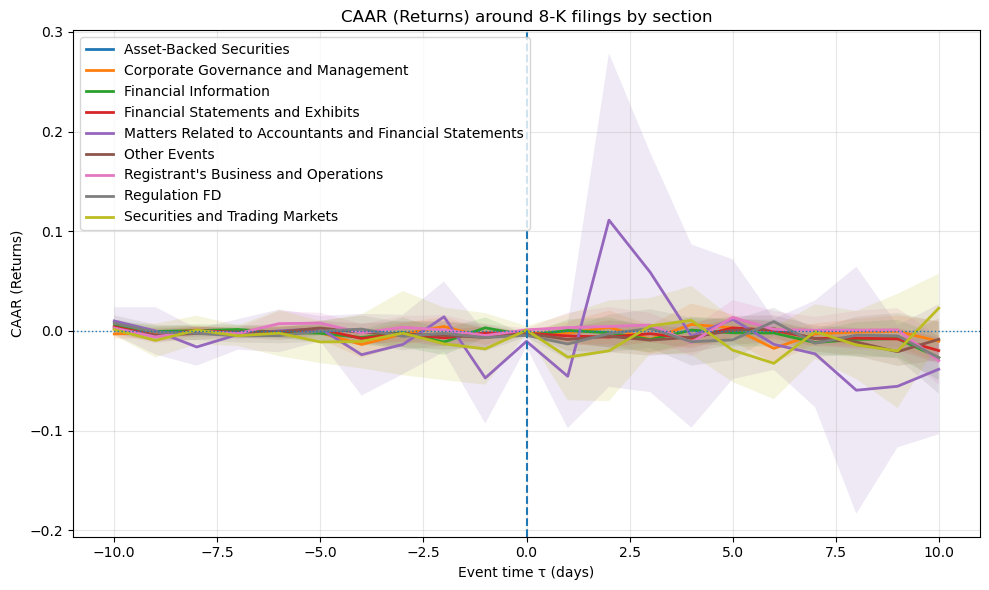

In [81]:
all_sections_caar = []

for section in sections_list:
    # Filter rows matching the section
    df_section = df_8k_iti_filter.filter(pl.col('item_section').str.contains(section))
    df_section = df_section.select(['permno', 'date'])
    print(f"Processing section: {section} with {df_section.height} events")

    # Compute CAAR for *that* subsample
    specific_item_results_returns = item_results_returns.merge(
        df_section.to_pandas(),
        on=['permno', 'date'],
        how='inner'
    )
    caar_general = compute_caar_ci(specific_item_results_returns)

    # Add a column with the section name
    caar_general['section'] = section

    # Append to list
    all_sections_caar.append(caar_general)

# Concatenate all results
all_sections_caar = pd.concat(all_sections_caar, ignore_index=True)

plot_caar_ci_multi(all_sections_caar,
                   title="CAAR (Returns) around 8-K filings by section",
                   type='Returns')